In [8]:
import keras
import tensorflow
from tensorflow.keras import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

from skimage import io, transform

import os, glob

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [10]:
train_images = glob.glob("/content/fingers/train/*.png")
test_images = glob.glob("/content/fingers/test/*.png")

In [11]:
X_train = []
X_test = []
y_train = []
y_test = []
    
for img in train_images:
    img_read = io.imread(img)
    # Most images are already of size (128,128) but it is always better to ensure they all are
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    X_train.append(img_read)
    # The info about the number of fingers and the fact that this is a right or left hand is in two characters of the path
    y_train.append(img[-6:-4])
    
for img in test_images:
    img_read = io.imread(img)
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    X_test.append(img_read)
    y_test.append(img[-6:-4])

In [12]:
y_train[:5]

['1L', '0L', '0R', '5L', '2L']

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthikeswarareddy","key":"cae30ab2e67fc348411f4e6f2fdf42be"}'}

In [4]:
!pip install Kaggle
!mkdir -p ~/kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d koryakinp/fingers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 362M/363M [00:19<00:00, 22.8MB/s]
100% 363M/363M [00:19<00:00, 19.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
from zipfile import ZipFile
file_name = "fingers.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('done')

done


In [13]:
X_train = []
X_test = []
y_train = []
y_test = []
    
for img in train_images:
    img_read = io.imread(img)
    # Most images are already of size (128,128) but it is always better to ensure they all are
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    X_train.append(img_read)
    # The info about the number of fingers and the fact that this is a right or left hand is in two characters of the path
    y_train.append(img[-6:-4])
    
for img in test_images:
    img_read = io.imread(img)
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    X_test.append(img_read)
    y_test.append(img[-6:-4])

In [ ]:
y_train[:5]

['1L', '0L', '0R', '5L', '2L']

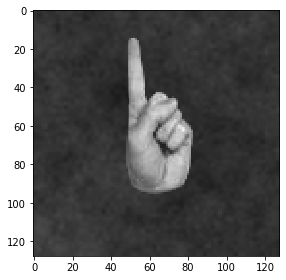

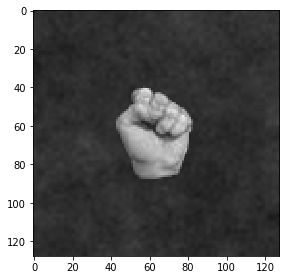

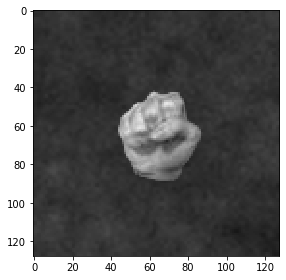

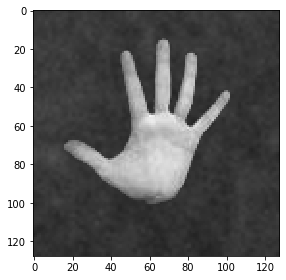

In [14]:
io.imshow(X_train[0])
plt.show()
io.imshow(X_train[1])
plt.show()
io.imshow(X_train[2])
plt.show()
io.imshow(X_train[3])
plt.show()

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [16]:
print(X_train.shape,X_test.shape)

(18000, 128, 128) (3600, 128, 128)


In [17]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [18]:
label_to_int={
    '0R' : 0,
    '1R' : 1,
    '2R' : 2,
    '3R' : 3,
    '4R' : 4,
    '5R' : 5,
    '0L' : 0,
    '1L' : 1,
    '2L' : 2,
    '3L' : 3,
    '4L' : 4,
    '5L' : 5
}

In [19]:
temp = []
for label in y_train:
    temp.append(label_to_int[label])
y_train = temp.copy()

temp = []
for label in y_test:
    temp.append(label_to_int[label])
y_test = temp.copy()

In [20]:
y_train = keras.utils.to_categorical(y_train, num_classes = 12)
y_test = keras.utils.to_categorical(y_test, num_classes = 12)

In [21]:
weight_decay = 1e-4

num_classes = 12

model = Sequential()

model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(128,128,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation="linear"))
model.add(Activation('elu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0003), metrics=['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1088      
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      65600     
                                                                 
 activation_1 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                        

In [ ]:
model.fit(x = X_train,y = y_train, batch_size=64, validation_data = (X_test,y_test), epochs = 5)

Epoch 1/5
282/282 [==============================] - 154s 500ms/step - loss: 0.3653 - accuracy: 0.9553 - val_loss: 17.5600 - val_accuracy: 0.0000e+00
Epoch 2/5
206/282 [====================>.........] - ETA: 34s - loss: 0.0551 - accuracy: 0.9998

In [ ]:
print(model.evaluate(X_test, y_test))


113/113 [==============================] - 6s 56ms/step - loss: 0.0814 - accuracy: 0.9928
[0.08140303194522858, 0.9927777647972107]


In [ ]:
predicted_classes = model.predict(X_train[:,:,:,:])
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

563/563 [==============================] - 30s 53ms/step


In [ ]:
predicted_classes[0]

1

In [ ]:
import numpy as np
k = X_train.shape[0]
r = np.random.randint(k)
r

16819

In [ ]:
print(predicted_classes[r])
print(y_train[r])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
